<a href="https://colab.research.google.com/github/imPhacko/PublicProjects/blob/main/LinearRegression_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
## Definition

Predict a continuous variable $y$ assuming it’s linearly dependent on variables $x_1, x_2,... x_k$:

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_k x_k$

or

$y = \theta^T X$,

where $X=(1, x_1, x_2,... x_k)$

$x_1, x_2,... x_k$ are independent variables, $y$ is the dependent variable and $\theta$ are the model's parameters.



(-10.0, 10.0)

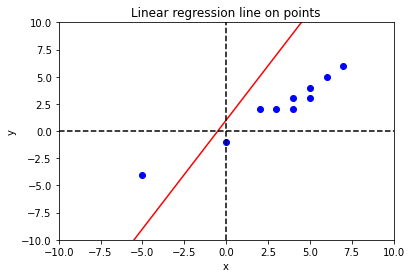

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = [-5, 0, 4, 5, 4, 6, 7, 3, 2, 5]
y = [-4, -1, 3, 3, 2, 5, 6, 2, 2, 4]

plt.scatter(x, y, color="blue")


def draw_line(theta):
    X = np.ones((2, 2))
    X[1, 0] = -100
    X[1, 1] = 100

    plt.plot(X[1], np.matmul(theta, X), color="red")

draw_line([1.0, 2.0])

plt.axvline(0.0, ls="--", color="black")
plt.axhline(0.0, ls="--", color="black")

plt.title("Linear regression line on points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([-10, 10])

## Optimizing

What we need:

1. Data (observations of dependent AND independent variables)
2. Model (linear)
3. Loss function (to determine how well our model fits the data)

### Least squares

Assume we have $n$ observations as vectors $X_1, X_2,... X_n$ and their corresponding outcomes $\hat{y}_1, \hat{y}_2, ..., \hat{y}_n$.

Reminder:

$y_i=\theta^T X_i$

Least squares error:

$\mathcal{L}=\sum\limits_{i=1}^n (\hat{y}_i-y_i)^2$


Why is this functions so great? It's convex! If we minimize it we'll obtain a good fit (with some not-so-modest assumptions) given the data. Since there's only one minimum we can optimize by setting the loss function's derivative w.r.t $\theta$ to 0:

$\dfrac{\partial }{\partial \theta_j} \mathcal{L}(\theta)=0$


Turns out in this case (using least squares error) this expression has a closed-form solution!

$\theta=(X^T X)^{-1}\hat{y}^T X$

Let's not look at this equation ever again!

(2,) (2, 2)
[-81.8705481   81.21490064]


(-10.0, 10.0)

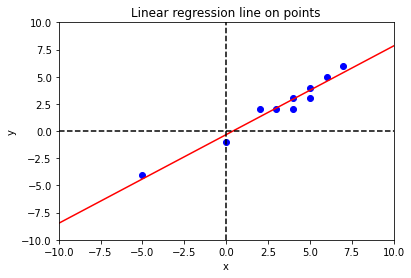

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = [-5, 0, 4, 5, 4, 6, 7, 3, 2, 5]
y = [-4, -1, 3, 3, 2, 5, 6, 2, 2, 4]

X = np.ones((2, len(x)), dtype=np.float32)
X[1] = x

y = np.array(y, dtype=np.float32)

res = np.matmul(X.T, X)
res = np.linalg.pinv(res)
res = np.matmul(res, y.T)
res = np.matmul(res, X.T)
theta = res

def draw_line(theta):
    X = np.ones((2, 2))
    X[1, 0] = -100
    X[1, 1] = 100
    print(theta.shape, X.shape)
    print(np.matmul(theta, X))

    plt.plot(X[1], np.matmul(theta, X), color="red")

plt.scatter(x, y, color="blue")
draw_line(theta)

plt.axvline(0.0, ls="--", color="black")
plt.axhline(0.0, ls="--", color="black")

plt.title("Linear regression line on points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([-10, 10])

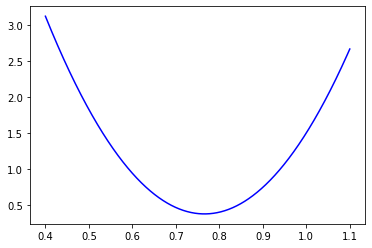

In [ ]:
def least_squares(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

x = np.array([-5, 0, 4, 5, 4, 6, 7, 3, 2, 5])
y = np.array([-4, -1, 3, 3, 2, 5, 6, 2, 2, 4])
losses = []
thetas = np.linspace(0.4, 1.1, 1000)
for theta in thetas:
    y_pred = theta * x

    losses.append(least_squares(y, y_pred))


plt.plot(thetas, losses, color="blue")

(-10.0, 10.0)

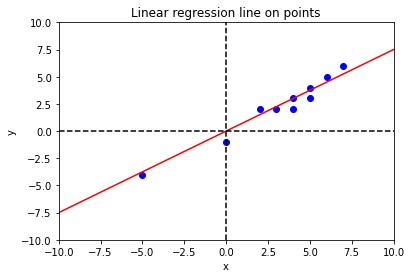

In [ ]:
theta = 0.75

def draw_line(theta):
    X = np.ones((2,))
    X[0] = -100
    X[1] = 100

    plt.plot(X, theta * X, color="red")

plt.scatter(x, y, color="blue")
draw_line(theta)

plt.axvline(0.0, ls="--", color="black")
plt.axhline(0.0, ls="--", color="black")

plt.title("Linear regression line on points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([-10, 10])

$\theta=(X^T X)^{-1}\hat{y}^T X$

(-10.0, 10.0)

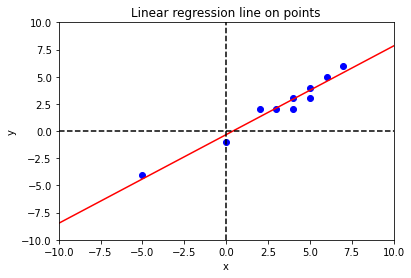

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

x = [-5, 0, 4, 5, 4, 6, 7, 3, 2, 5]
y = [-4, -1, 3, 3, 2, 5, 6, 2, 2, 4]

X = np.ones((2, len(x)), dtype=np.float32)
X[1] = x

y = np.array(y, dtype=np.float32)[np.newaxis]

X_T = tf.transpose(X)
a = tf.matmul(X_T, X)
a = tf.linalg.pinv(a)
y_t = tf.transpose(y)
a = tf.matmul(a, y_t)
a = tf.transpose(a)

result = tf.matmul(a, X_T)

theta = result[0]


def draw_line(theta):
    X = np.ones((2, 2))
    X[1, 0] = -100
    X[1, 1] = 100

    plt.plot(X[1], np.matmul(theta, X), color="red")

plt.scatter(X[1], y, color="blue")
draw_line(theta)

plt.axvline(0.0, ls="--", color="black")
plt.axhline(0.0, ls="--", color="black")

plt.title("Linear regression line on points")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
